# Building Decision Tree Model

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt


In [4]:
#loading data
data=pd.read_csv('C:\\NYC_trip.csv')
data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [5]:
data.shape

(729322, 11)

In [6]:
data.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [7]:
#changing datatypes
data.pickup_datetime=pd.to_datetime(data.pickup_datetime)
data.dropoff_datetime=pd.to_datetime(data.dropoff_datetime)
data['store_and_fwd_flag']=1*(data.store_and_fwd_flag.values=='Y')

In [8]:
#creating new data columns
data['Pickup_day']=data.pickup_datetime.dt.dayofweek
data['Dropoff_day']=data.dropoff_datetime.dt.dayofweek
data['Pickup_hour']=data.pickup_datetime.dt.hour
data['Dropoff_hour']=data.dropoff_datetime.dt.hour
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,Pickup_day,Dropoff_day,Pickup_hour,Dropoff_hour
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,0,400,0,0,16,16
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,0,1100,4,4,23,23
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,0,1635,6,6,17,18
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,0,1141,1,1,9,10
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,0,848,2,2,6,6


In [9]:
#segeragating variables
x=data.drop(['trip_duration', 'id', 'pickup_datetime', 'dropoff_datetime'], axis=1)    #independent variable 
y=data['trip_duration']                                           #dependent variable

In [10]:
#importing train test split
from sklearn.model_selection import train_test_split as tts
#splitting the data
train_x, test_x, train_y, test_y=tts(x,y, random_state=67)

In [11]:
from sklearn.tree import DecisionTreeRegressor as DTS
dts=DTS(max_leaf_nodes=15, random_state=67)            #creating instance
dts.fit(train_x, train_y)                              #fitting data

DecisionTreeRegressor(max_leaf_nodes=15, random_state=67)

In [12]:
#predicting values on test set
pred_test=dts.predict(test_x)
from sklearn.metrics import r2_score as r2
r_sq=r2(test_y, pred_test)
print('R-square Error', r_sq)

R-square Error 0.01469103318311904


In [27]:
#predicting values on train set
pred_train=dts.predict(train_x)
r_sq=r2(train_y, pred_train)
print('R-square Error', r_sq)

R-square Error 0.42747709135425294


In [ ]:
rom sklearn.tree import export_graphviz as eg
eg(dts, out_file='C:\\DTModel.dot', feature_names=data["trip_duration"])

Attempting To interpret variable importance

In [14]:
print(dts.feature_importances_)

[0.00127018 0.         0.01428288 0.00178183 0.49203862 0.00581007
 0.         0.         0.         0.         0.48481642]


range(0, 11)


Text(0.5, 1.0, 'interpretion of variable importance')

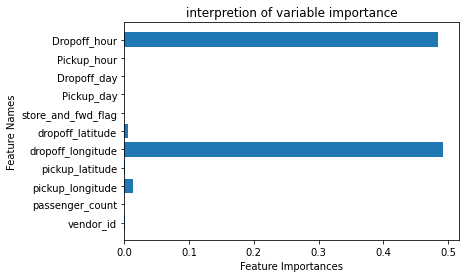

In [25]:
#plot
n_ft=train_x.shape[1]
print(range(n_ft))
plt.barh(range(n_ft),dts.feature_importances_, align='center')
plt.yticks(ticks=np.arange(n_ft), labels=train_x.columns)
plt.xlabel('Feature Importances')
plt.ylabel('Feature Names')
plt.title("interpretion of variable importance")

Bargraph for Train Score

In [38]:
#plotting 
plt.figure(figsize=(8,6), dpi=120, facecolor='w', edgecolor='b')


<Figure size 960x720 with 0 Axes>

<Figure size 960x720 with 0 Axes>